# Pymaceuticals Inc.
---

### Analysis
* 1. Capomulin is an effective drug at decreasing the tumors according to this mouse metadata as seen by the reduction in tumors as seen by the line plot comparing tumor volume with time. With that being said, while the oerall tumors tend to decrease over time, they seem to get larger at around 34 days into the treatment from their lowest amount signifying the possible limitations of the treatment. 
2. There appears to be a significant correlation between the size of a tumor and the mice weight as shown by the scatter plot and the r squared value of 0.7 which shows signifcant correlation. This could also make logical sense as it would seem to make sense that mice who are larger would experience larger tumors on average. 
3. Capomulin and ramicane appear to be the most effective drugs in treating mice as they have been tested the most amount of unique times as shown by the bar graphs and the box plots signify they both are able to shrink the tumor result compared to any of the other drugs. The tails of the box plot showing tumor reduction do not overlap with capomulin and ramicane compared to any of the other drugs showing the significance of this data and the efficacy of these two drugs compared to the others in this sample. 

In [162]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [33]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [34]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [35]:
# Combine the data into a single dataset
combined_df = study_results.merge(mouse_metadata, on =  "Mouse ID")
# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [38]:
# Checking the number of mice.
combined_df["Mouse ID"].unique().size

249

In [43]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mask = combined_df.duplicated(subset = ["Mouse ID", "Timepoint"])
combined_df[duplicate_mask]["Mouse ID"].unique()

array(['g989'], dtype=object)

In [50]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
g989_mask = combined_df["Mouse ID"] == "g989"
df = combined_df.drop(combined_df[g989_mask].index)
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [51]:
# Checking the number of mice in the clean DataFrame.
df["Mouse ID"].unique().size

248

## Summary Statistics

In [76]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

# Assemble the resulting series into a single summary dataframe.                                                
df_stats = pd.DataFrame(index = df["Drug Regimen"].unique()).rename_axis("Drug Regimen")

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tumor_by_drug = df.groupby("Drug Regimen")["Tumor Volume (mm3)"]
df_stats["Mean Tumor Volume"] = tumor_by_drug.mean()
df_stats["Median Tumor Volume"] = tumor_by_drug.median()
df_stats["Tumor Volume Variance"] = tumor_by_drug.var()
df_stats["Tumor Volume Std. Dev."] = tumor_by_drug.std()
df_stats["Tumor Volume Std. Err."] = tumor_by_drug.sem()

df_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331


In [73]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM 
#of the tumor volume for each regimen
tumor_by_drug.agg({'Tumor Volume (mm3)' : ['mean', 'median', 'var', 'std', 'sem']})


# Using the aggregation method, produce the same summary statistics in a single line


SpecificationError: nested renamer is not supported

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

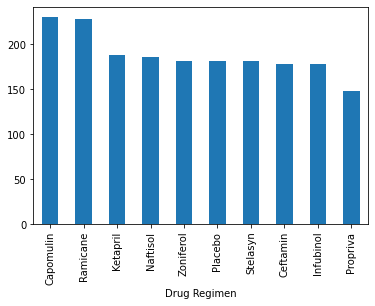

In [89]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
df_by_drug = df.groupby('Drug Regimen')
#Directions asked for unique mice but graph example does indicates count
mice_per_drug = df_by_drug['Mouse ID'].unique().map(lambda x: len(x))


results_per_drug = df_by_drug['Mouse ID'].count().sort_values(ascending = False)
mice_per_drug

mice_per_drug.plot.bar()
results_per_drug.plot.bar()

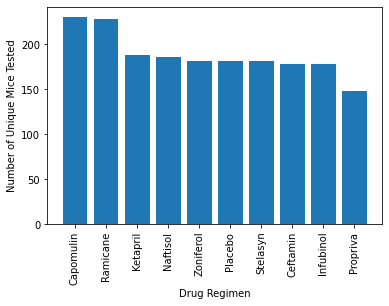

In [95]:
# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.
plt.bar(results_per_drug.index, results_per_drug.values)
plt.xticks(rotation = 'vertical');
plt.xlabel("Drug Regimen");
plt.ylabel("Number of Unique Mice Tested");

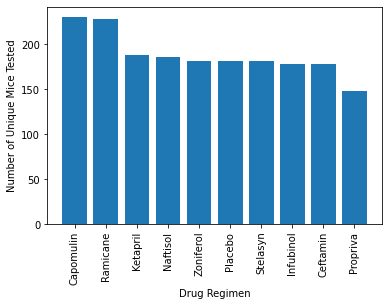

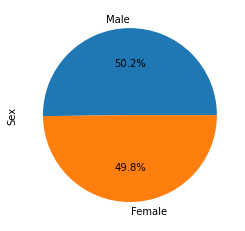

In [109]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_metadata['Sex'].value_counts().plot.pie(autopct='%1.1f%%');

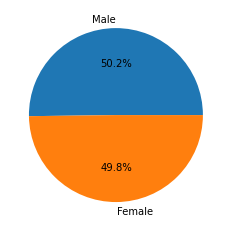

In [115]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_metadata
sex_data = mouse_metadata['Sex'].value_counts()
sex_data.values
sizes = sex_data.values
labels = sex_data.index

plt.pie(sizes, labels=labels,
        autopct="%1.1f%%");

## Quartiles, Outliers and Boxplots

In [122]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
tp_max_per_mouse = combined_df.groupby('Mouse ID')['Timepoint'].max()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
combined_df_45 = pd.DataFrame(data = tp_max_per_mouse).merge(combined_df)
combined_df_45


,Timepoint,Mouse ID,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,45,b128,38.982878,2,Capomulin,Female,9,22
1,45,h246,74.104086,2,Ketapril,Male,13,30
2,45,p189,75.294936,4,Ketapril,Male,8,28
3,45,b559,73.051363,1,Naftisol,Male,20,26
4,45,y260,62.909441,4,Ketapril,Female,7,25
...,...,...,...,...,...,...,...,...
40317,20,t565,39.070214,0,Capomulin,Female,20,17
40318,20,i557,43.967895,0,Capomulin,Female,1,24
40319,20,m957,38.909349,1,Capomulin,Female,3,19
40320,20,f966,30.485985,0,Capomulin,Male,16,17


In [148]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_mask = combined_df_45['Drug Regimen'] == drug
    
    # add subset 
    
    drug_df = combined_df_45[drug_mask]['Tumor Volume (mm3)'].sort_values()
    tumor_vol_list.append(drug_df)
    # Determine outliers using upper and lower bounds
    drug_stats = drug_df.describe()
    #q1 is 25%, q3 is 75%
    q1 = drug_stats['25%']
    q3 = drug_stats['75%']
    iqr = q3-q1
     
    #u bound is q3+(iqr *1.5)
    u = q3+ (iqr * 1.5)
    l = q1- (iqr *1.5)
    outliers_mask = drug_df.map(lambda x: x > u or x < l)
    #print(outliers_mask)
    #print(drug_df)
    #print(f'[q1, q3, iqr, u, l] = {[q1, q3, iqr, u, l]}')
    print(f'{drug}\'s potential outliers: {drug_df[outliers_mask]}')

Capomulin's potential outliers: 13111    23.343598
4921     23.343598
6871     23.343598
891      23.343598
10641    23.343598
           ...    
501      23.343598
8431     23.343598
13241    23.343598
10381    23.343598
14281    23.343598
Name: Tumor Volume (mm3), Length: 130, dtype: float64
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


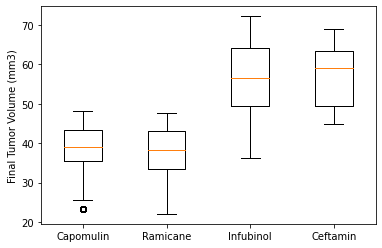

In [142]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_vol_list
treatment_list
plt.boxplot(tumor_vol_list, labels = treatment_list);
plt.ylabel('Final Tumor Volume (mm3)');

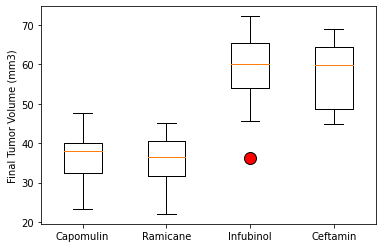

## Line and Scatter Plots

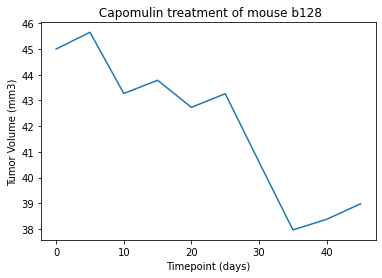

In [156]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Get data for a mouse treated with Capomulin 
cap_mask = combined_df["Drug Regimen"] == 'Capomulin'
cap_df = combined_df[cap_mask]
mouse_mask = cap_df["Mouse ID"] == cap_df["Mouse ID"][0] 
mouse_df = cap_df[mouse_mask]
# Plot with timeseries data
combined_df
mouse_df

plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)']);
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')
plt.title(f' Capomulin treatment of mouse {cap_df["Mouse ID"][0]}');

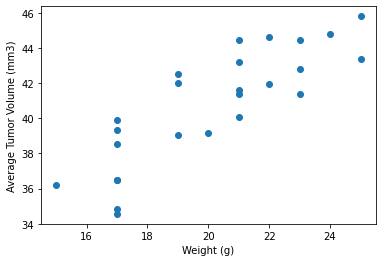

In [161]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
x = cap_df.groupby('Mouse ID')['Weight (g)'].mean()
y = cap_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
plt.plot(x, y, 'o')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)');


## Correlation and Regression

The r-squared is: 0.7088568047708723


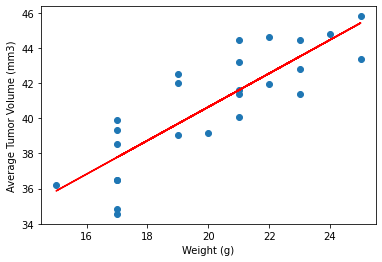

In [164]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)');
print(f"The r-squared is: {rvalue**2}")